In [5]:
#Importing the necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [239]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [6]:
# Reading the raw data
df=pd.read_csv("telecom_churn_data.csv")

In [7]:
#Storing the raw data in a separate table
original=df

## Understanding the data

In [8]:
#Viewing the shape of the dataframe
df.shape

(99999, 226)

In [9]:
#Storing the names of all the columns in 'col'
col=df.columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [12]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Preparation

####  Scope of our analysis


We will filter for the high value customers (>70th percentile of the avg recharge amount for the first two months)

In [13]:
#Before calculating the avg spend in the good phase, confirming if there are any nan values in the two columns
df[['total_rech_amt_6','total_rech_amt_7','total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']].isna().sum()


total_rech_amt_6          0
total_rech_amt_7          0
total_rech_data_6     74846
total_rech_data_7     74428
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
dtype: int64

There few nulls in the fields, we will replace them with zero -> indicating not recharged, hence zero

In [14]:
df.total_rech_data_6=df.total_rech_data_6.fillna(0)
df.total_rech_data_7=df.total_rech_data_7.fillna(0)
df.av_rech_amt_data_6=df.av_rech_amt_data_6.fillna(0)
df.av_rech_amt_data_7=df.av_rech_amt_data_7.fillna(0)

In [15]:
#Calculating the data recharge amount
df['total_rech_data_amt_6']=df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_data_amt_7']=df['total_rech_data_7'] * df['av_rech_amt_data_7']

#total_rech_amt_6 is only for voice and not consider data, hence we need to add the data recharge amount to get total spend for a month

df['total_rech_6']=df['total_rech_amt_6']+df['total_rech_data_amt_6']
df['total_rech_7']=df['total_rech_amt_7']+df['total_rech_data_amt_7']
df['avg_rech_good']=(df['total_rech_6']+df['total_rech_7'])/2

In [16]:
#Creating new field which tells whether the customer is a high value customer
df['High_value_cust']=np.where(df.avg_rech_good>=df.avg_rech_good.quantile(0.7),"Y","N")

In [17]:
df.High_value_cust.value_counts()

N    69998
Y    30001
Name: High_value_cust, dtype: int64

In [18]:
#Filtering for only High Value customers & storing in a new dataframe - df1
df1=df[df.High_value_cust=='Y']
df1.shape

(30001, 232)

In [19]:
## Creating the churn field based on the Incoming, outgoing and internet usage in the last month
df1['churn']=np.where((df1.total_og_mou_9==0) & (df1.total_ic_mou_9==0) & (df1.vol_2g_mb_9==0) & (df1.vol_3g_mb_9==0),1,0)
df1.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [20]:
## Since we have now created the 'y' variable (churn) based on the 4 attributes, we will now remove the attributes with '_9' (indicating last month attributes) from the analysis

last_month=[x for x in df.columns if "_9" in x]
print(df1.shape)
#Dropping all the last month attributes
df1=df1.drop(df1[last_month],1)

df1=df1.drop(['High_value_cust','sep_vbc_3g'],1)
print(df1.shape)

(30001, 233)
(30001, 177)


In [21]:
y=df1['churn']

In [22]:
#Churn rate
sum(y)/len(df1.churn)*100

8.136395453484884

Churn rate is only 8.14%.
This is an imbalanced dataset. We will balance the dataset after computing the missing values in the dataframe

## Data Cleaning

In [23]:
round(df1.isna().sum()/len(df1.index),2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.01
std_og_t2o_mou              0.01
loc_ic_t2o_mou              0.01
last_date_of_month_6        0.00
last_date_of_month_7        0.00
last_date_of_month_8        0.01
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 0.02
onnet_mou_7                 0.02
onnet_mou_8                 0.04
offnet_mou_6                0.02
offnet_mou_7                0.02
offnet_mou_8                0.04
roam_ic_mou_6               0.02
roam_ic_mou_7               0.02
roam_ic_mou_8               0.04
roam_og_mou_6               0.02
roam_og_mou_7               0.02
roam_og_mou_8               0.04
loc_og_t2t_mou_6            0.02
loc_og_t2t_mou_7            0.02
loc_og_t2t_mou_8            0.04
loc_og_t2m_mou_6            0.02
loc_og_t2m_mou_7            0.02
loc_og_t2m_mou_8            0.04
loc_og_t2f_mou_6            0.02
loc_og_t2f

In [24]:
df1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_6,total_rech_7,avg_rech_good,churn
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.00

In [25]:
col1=df1.columns
#df1[df1.columns].nunique
#print(col)
df1[col1].nunique()


mobile_number               30001
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      29072
arpu_7                      29084
arpu_8                      28073
onnet_mou_6                 16890
onnet_mou_7                 16987
onnet_mou_8                 15872
offnet_mou_6                21220
offnet_mou_7                21263
offnet_mou_8                20163
roam_ic_mou_6                4048
roam_ic_mou_7                3385
roam_ic_mou_8                3433
roam_og_mou_6                4744
roam_og_mou_7                3994
roam_og_mou_8                4001
loc_og_t2t_mou_6            10420
loc_og_t2t_mou_7            10394
loc_og_t2t_mou_8            10063
loc_og_t2m_mou_6            15625
loc_og_t2m_mou_7            15674
loc_og_t2m_mou_8            15130
loc_og_t2f_mou

In [26]:
#Deleting columns which have only one unique value
df1=df1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
             'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','last_date_of_month_6',
              'last_date_of_month_7','last_date_of_month_8'],1)

In [27]:
df1.shape

(30001, 164)

In [28]:
#Converting date fields to datetime format and filling all the blanks with 0

df1['date_of_last_rech_6'] = pd.to_datetime(df1.date_of_last_rech_6).dt.day
df1.date_of_last_rech_6=df1.date_of_last_rech_6.fillna(0)
df1['date_of_last_rech_7'] = pd.to_datetime(df1.date_of_last_rech_7).dt.day
df1.date_of_last_rech_7=df1.date_of_last_rech_7.fillna(0)
df1['date_of_last_rech_8'] = pd.to_datetime(df1.date_of_last_rech_8).dt.day
df1.date_of_last_rech_8=df1.date_of_last_rech_8.fillna(0)

df1['date_of_last_rech_data_6'] = pd.to_datetime(df1.date_of_last_rech_data_6).dt.day
df1.date_of_last_rech_data_6=df1.date_of_last_rech_data_6.fillna(0)
df1['date_of_last_rech_data_7'] = pd.to_datetime(df1.date_of_last_rech_data_7).dt.day
df1.date_of_last_rech_data_7=df1.date_of_last_rech_data_7.fillna(0)
df1['date_of_last_rech_data_8'] = pd.to_datetime(df1.date_of_last_rech_data_8).dt.day
df1.date_of_last_rech_data_8=df1.date_of_last_rech_data_8.fillna(0)

In [29]:
# We will not use the date fields as >40% are blank
df1=df1.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],1)

Imputing the missing values with the median for the respective columns

In [30]:
pending=df1.columns[df1.isna().sum()>0]

In [31]:
#pending will store all the fields which have Na's
pending

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=104)

In [32]:
#Since all are continuous variables, we will impute the missing values by using median of each column
for i in pending:
    df1[i].fillna((df1[i].median()),inplace=True)

In [33]:
df1.isna().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

In [34]:
df1.shape

(30001, 158)

### Checking for outliers

In [35]:
df1.describe(percentiles=[0.005,0.01, 0.10,.25,.5,.75,.90,.95,.99,.995])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_6,total_rech_7,avg_rech_good,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0000

Mean is away from the Median and the difference between the 99th percentile and the max value is huge in almost every variable, which confirms the presence of outliers in the data. Same can be seen with the minimum values

#### We will replace the outlier values with the 1%ile and 99.5%ile values with the extreme values

In [36]:
cols = [col for col in df1.columns if col not in ['churn','mobile_number']]

for col in cols:
    percentiles = df1[col].quantile([0.01,0.995]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]

In [37]:
# Reviewing the data for outliers
df1.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99,.995])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_6,total_rech_7,avg_rech_good,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

## Deriving New features

Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline

Converting the AON field to years and creating relevant buckets 

In [38]:
df1['int_usage_median'] = df1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df1['int_usage_median'] = df1.int_usage_median.map(lambda x: 1 if x == 0 else 0)
df1 = df1.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


In [39]:
df1['Tenure']=np.round(df1.aon/365,1)
tenure_bins = [1, 2, 3, 4, 10]
df1['tenure_bucket'] = pd.cut(df1['Tenure'], tenure_bins)
df1['tenure_bucket'].value_counts()

(4, 10]    8978
(1, 2]     7819
(2, 3]     4496
(3, 4]     2919
Name: tenure_bucket, dtype: int64

In [40]:
df1.shape

(30001, 155)

In [41]:
df1=df1.drop(['Tenure','aon'],1)

### Correlation analysis

In [42]:
df1.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_6,total_rech_7,avg_rech_good,churn,int_usage_median
mobile_number,1.000000,0.039864,0.037955,0.045238,0.010586,0.005953,0.007861,0.022394,0.011279,0.021286,0.012909,0.004319,0.011859,0.006245,0.003174,0.003926,0.057460,0.055068,0.055384,0.087588,0.082784,0.085366,0.073760,0.073801,0.074953,-0.008679,-0.014525,-0.005963,0.090381,0.087396,0.088214,-0.016608,-0.019467,-0.015906,-0.027603,-0.032875,-0.027065,0.034751,0.030527,0.035729,-0.028272,-0.034382,-0.027616,-0.003507,0.001097,-0.005373,-0.024265,-0.024261,-0.017616,-0.011649,0.007047,0.007909,0.023177,0.013718,0.021396,0.047108,0.041487,0.047229,0.074229,0.067135,0.068882,0.068342,0.071707,0.069897,0.077264,0.071502,0.073090,-0.004961,0.000632,-0.006171,-0.011286,-0.013940,-0.013580,0.032782,0.026231,0.030385,-0.007827,-0.008088,-0.008317,0.065698,0.059879,0.061754,-0.028705,-0.011064,-0.034147,0.013051,0.009757,0.006913,0.020683,0.014709,0.012579,-0.031702,-0.044630,-0.037846,0.038874,0.039529,0.043235,0.064938,0.065211,0.070445,0.050888,0.054344,0.052224,-0.044480,-0.043284,-0.036563,0.014571,0.018375,0.018070,-0.042862,-0.042510,-0.034994,-0.015511,-0.011775,-0.006467,-0.014368,-0.011623,-0.001581,0.004100,0.006526,0.010439,0.000353,0.002108,0.008534,-0.014027,-0.013444,-0.008002,0.010162,0.009564,0.008918,-0.044180,-0.043570,-0.033644,0.003258,0.005484,0.012779,-0.024909,-0.020844,-0.018971,-0.020614,-0.033459,-0.028345,0.316106,-0.032563,-0.032045,-0.042004,-0.032655,-0.027260,-0.012087,-0.010144,-0.011619,-0.030100,0.021159
arpu_6,0.039864,1.000000,0.602221,0.512714,0.417048,0.267861,0.232783,0.587046,0.387292,0.341232,0.154330,0.117556,0.126921,0.216980,0.161150,0.160305,0.233878,0.186670,0.177880,0.409761,0.314096,0.285099,0.193920,0.156801,0.148058,0.069955,0.005154,0.014610,0.414324,0.323535,0.294333,0.327526,0.192982,0.162256,0.366

Since there are too many numerical fields, it is practically difficult to compare the correlation 

In [43]:
# We will create a correlation matrix and store it in a separate df
corr_matrix = df1.corr().abs()

## Data Visualization

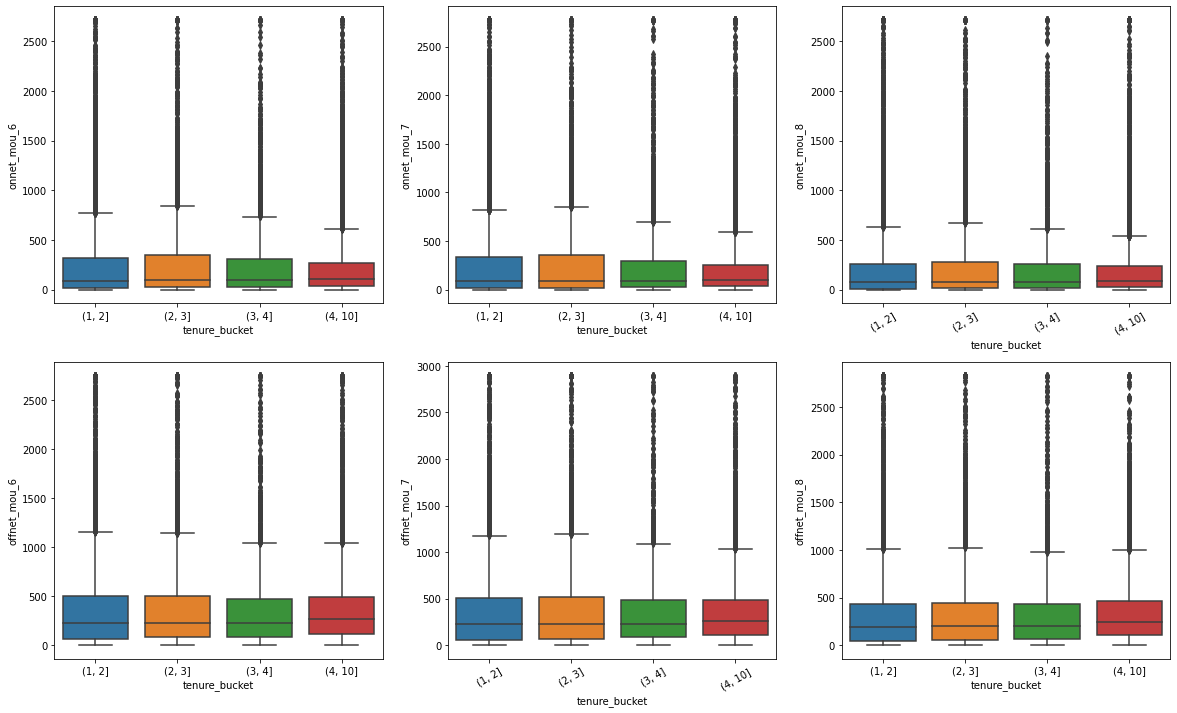

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'tenure_bucket', y = 'onnet_mou_6', data = df1)
plt.subplot(2,3,2)
sns.boxplot(x = 'tenure_bucket', y = 'onnet_mou_7', data = df1)
plt.subplot(2,3,3)
p=sns.boxplot(x = 'tenure_bucket', y = 'onnet_mou_8', data = df1)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.subplot(2,3,4)
sns.boxplot(x = 'tenure_bucket', y = 'offnet_mou_6', data = df1)
plt.subplot(2,3,5)
q=sns.boxplot(x = 'tenure_bucket', y = 'offnet_mou_7', data = df1)
plt.subplot(2,3,6)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
sns.boxplot(x = 'tenure_bucket', y = 'offnet_mou_8', data = df1)
plt.show()


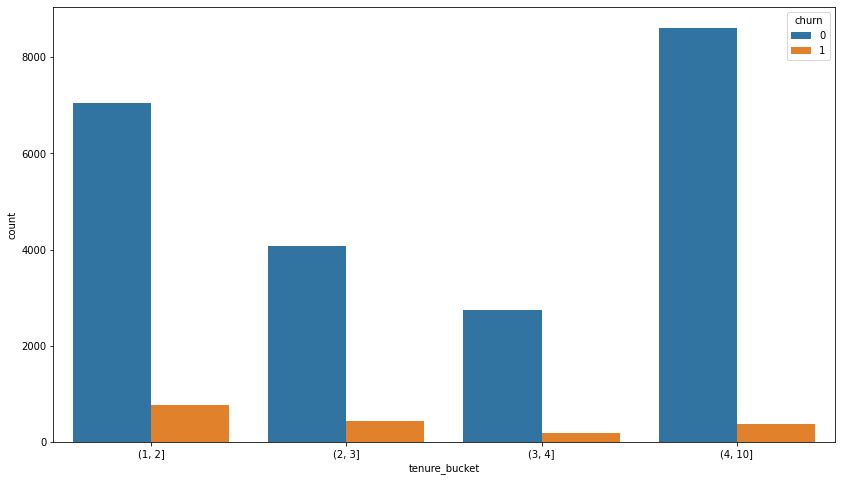

In [45]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_bucket', hue = 'churn',data = df1)
plt.show()

From the above plot we see that the customers who are in tenure bucket 1,2 , have a relatively higher churn when compared to other buckets

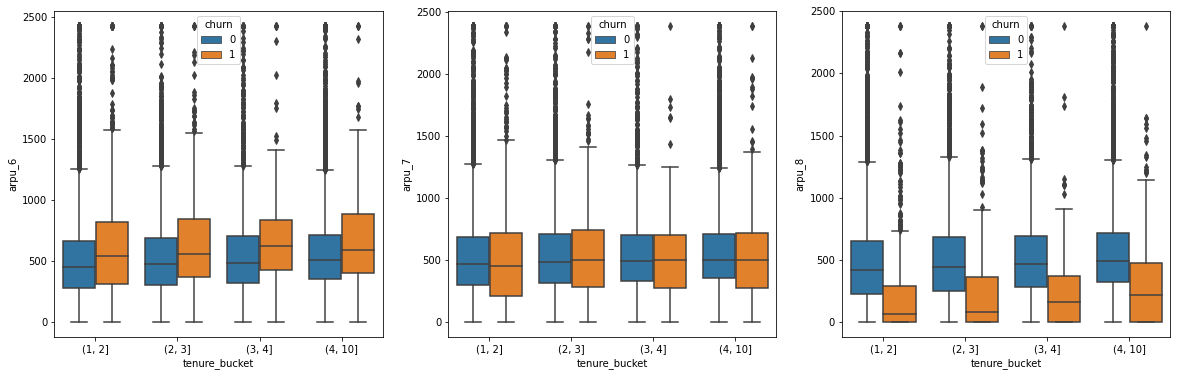

In [46]:
# Viewing churn by arpu

plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(x = 'tenure_bucket', y = 'arpu_6',hue='churn', data = df1)
plt.subplot(1,3,2)
sns.boxplot(x = 'tenure_bucket', y = 'arpu_7',hue='churn', data = df1)
plt.subplot(1,3,3)
p=sns.boxplot(x = 'tenure_bucket', y = 'arpu_8',hue='churn', data = df1)
plt.show()


From the above three plots, we can see that as we move towards month 8, the arpu for the churned customers drastically over the months


### Dummy Variable creation

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 154 entries, mobile_number to tenure_bucket
dtypes: category(1), float64(125), int32(1), int64(27)
memory usage: 36.4 MB


In [48]:
#create dummy for tenure_bucket as that is the only categorical variable 
df1 = pd.get_dummies(df1, drop_first=True)

In [284]:
df1.rename(columns={"tenure_bucket_(1, 2]": "tenure_bucket_1_to_2","tenure_bucket_(2, 3]":"tenure_bucket_2_to_3",
                   "tenure_bucket_(3, 4]":"tenure_bucket_3_to_4",
                   "tenure_bucket_(4, 10]":"tenure_bucket_4_to_10"}, inplace=True)

In [285]:
df1.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_6',
       'total_rech_7', 'avg_rech_good', 'churn', 'int_usage_median',
       'tenure_bucket_2_to_3', 'tenure_bucket_3_to_4',
       'tenure_bucket_4_to_10'],
      dtype='object', length=156)

### Model Building

Splitting into X, y and Test, Train 

In [286]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df1.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df1['churn']

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_6,total_rech_7,avg_rech_good,int_usage_median,tenure_bucket_2_to_3,tenure_bucket_3_to_4,tenure_bucket_4_to_10
0,0.080940,0.089722,0.089666,0.032435,0.031304,0.000000,0.083605,0.078473,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017150,0.016013,0.000000,0.053003,0.058594,0.000000,0.000922,0.001718,0.000000,0.0,0.0,0.000000,0.057211,0.060841,0.000000,0.001414,0.001381,0.000000,0.007319,0.006781,0.000000,0.000000,0.000000,0.000000,0.015037,0.014291,0.000000,0.0,0.000000,0.000000,0.003270,0.007782,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026653,0.025417,0.000160,0.065078,0.067411,0.003244,0.007212,0.007335,0.004198,0.071593,0.073105,0.002899,0.001385,0.001585,0.000000,0.009378,0.009012,0.000000,0.000000,0.000000,0.000000,0.014365,0.014229,0.000000,0.000000,0.000000,0.002522,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.035088,0.037037,0.119630,0.085453,0.088359,0.249505,0.240000,0.252,0.252,0.252,0.264984,0.0625,0.0625,0.000000,0.368339,0.368339,0.368339,0.000000,0.000000,0.000000,0.142857,0.125,0.142857,0.246817,0.209302,0.215794,0.202106,0.187907,0.207839,0.241565,0.207175,0.244371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.25,0.25,0.0,0.0,0.000000,1.0,1.0,1.0,0.225238,0.012162,0.000000,0.041260,0.034272,0.028708,0.070917,0.050542,0.009481,0.0,1.0,0.0,0.0
7,0.440252,0.565342,1.000000,0.021304,0.019701,0.019245,0.165083,0.195962,0.115210,0.033476,0.075764,0.07651,0.030968,0.018598,0.060672,0.034454,0.019491,0.028652,0.203866,0.320914,0.118919,0.520875,0.451191,0.479636,0.0,0.0,0.000000,0.186720,0.244735,0.124932,0.001810,0.009749,0.004949,0.020081,0.012132,0.020039,0.100165,0.277118,0.282904,0.018017,0.021461,0.022646,0.0,0.001991,0.110388,0.047463,0.000000,0.061623,0.0,0.0,0.0,0.127100,0.152960,0.091262,0.059532,0.030756,0.027279,0.1

In [287]:

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 154)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9001, 154)
Number transactions y_test dataset:  (9001,)


Since the data is not balanced, we will apply class_weight=balanced

In [288]:
from sklearn.preprocessing import StandardScaler

In [289]:
X_train.shape

(21000, 154)

In [303]:
pca = PCA(random_state=42)

In [304]:
pca.fit(X_train)
#churn_pca = pca.fit_transform(X_train)

PCA(random_state=42)


#### Components of PCA

In [305]:
pca.components_

array([[ 8.03738817e-02,  8.68591540e-02,  7.46081020e-02, ...,
         1.91015110e-02,  7.33350852e-04,  1.60936121e-02],
       [ 9.21190287e-02,  9.56008770e-02,  1.15563458e-01, ...,
        -1.23567374e-01, -3.22907633e-02,  4.86597555e-01],
       [ 1.34223308e-01,  1.65413471e-01,  1.65841860e-01, ...,
         1.49274280e-01,  4.97075707e-02, -4.58430610e-01],
       ...,
       [-1.34325784e-03,  2.11977829e-03, -9.94607848e-04, ...,
         6.33576850e-05,  2.27752722e-04,  2.67270529e-04],
       [-4.12516693e-03,  8.83299547e-03,  1.61684039e-03, ...,
         2.87403161e-05,  1.05016742e-04,  5.05745159e-05],
       [ 6.10718513e-03, -6.29016692e-03,  1.77670869e-03, ...,
         3.95386418e-05,  2.69433670e-05, -8.52716434e-05]])

Looking at the explained variance ratio for each component

In [306]:
pca.explained_variance_ratio_

array([1.37374234e-01, 1.05649687e-01, 7.82479861e-02, 6.03793088e-02,
       5.15057227e-02, 3.70951608e-02, 3.34592856e-02, 2.70304187e-02,
       2.46017728e-02, 2.30163059e-02, 2.06058033e-02, 2.02703682e-02,
       1.96260156e-02, 1.62609337e-02, 1.46362810e-02, 1.36749145e-02,
       1.35200519e-02, 1.31980230e-02, 1.18061376e-02, 1.11745680e-02,
       1.09793884e-02, 1.04406384e-02, 9.95709247e-03, 9.54606678e-03,
       9.26105519e-03, 8.43911356e-03, 7.80035191e-03, 7.26522561e-03,
       7.06003227e-03, 6.91966163e-03, 6.60070759e-03, 5.92496599e-03,
       5.89091923e-03, 5.73874394e-03, 5.52045374e-03, 5.33867761e-03,
       5.21174563e-03, 4.98454879e-03, 4.83440492e-03, 4.59667663e-03,
       4.49442004e-03, 4.47845955e-03, 4.41690838e-03, 4.16473154e-03,
       3.96211055e-03, 3.78078758e-03, 3.74618796e-03, 3.61387295e-03,
       3.51160199e-03, 3.43827533e-03, 3.31668402e-03, 2.98784416e-03,
       2.93285408e-03, 2.76952397e-03, 2.70211358e-03, 2.58765238e-03,
      

Making a scree plot for the explained variance

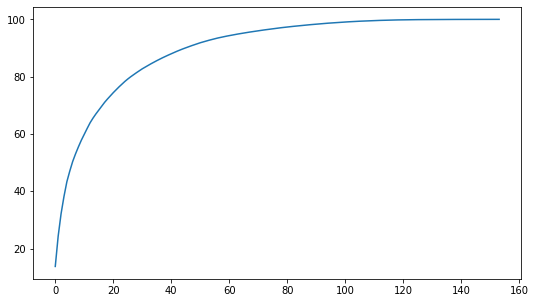

In [307]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

First 60 components explain 90% variance 

In [308]:
pca_final = IncrementalPCA(n_components=60)

In [309]:
df_train_pca = pca_final.fit_transform(X_train)

In [310]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [311]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

Plotting the heatmap of the corr matrix

<AxesSubplot:>

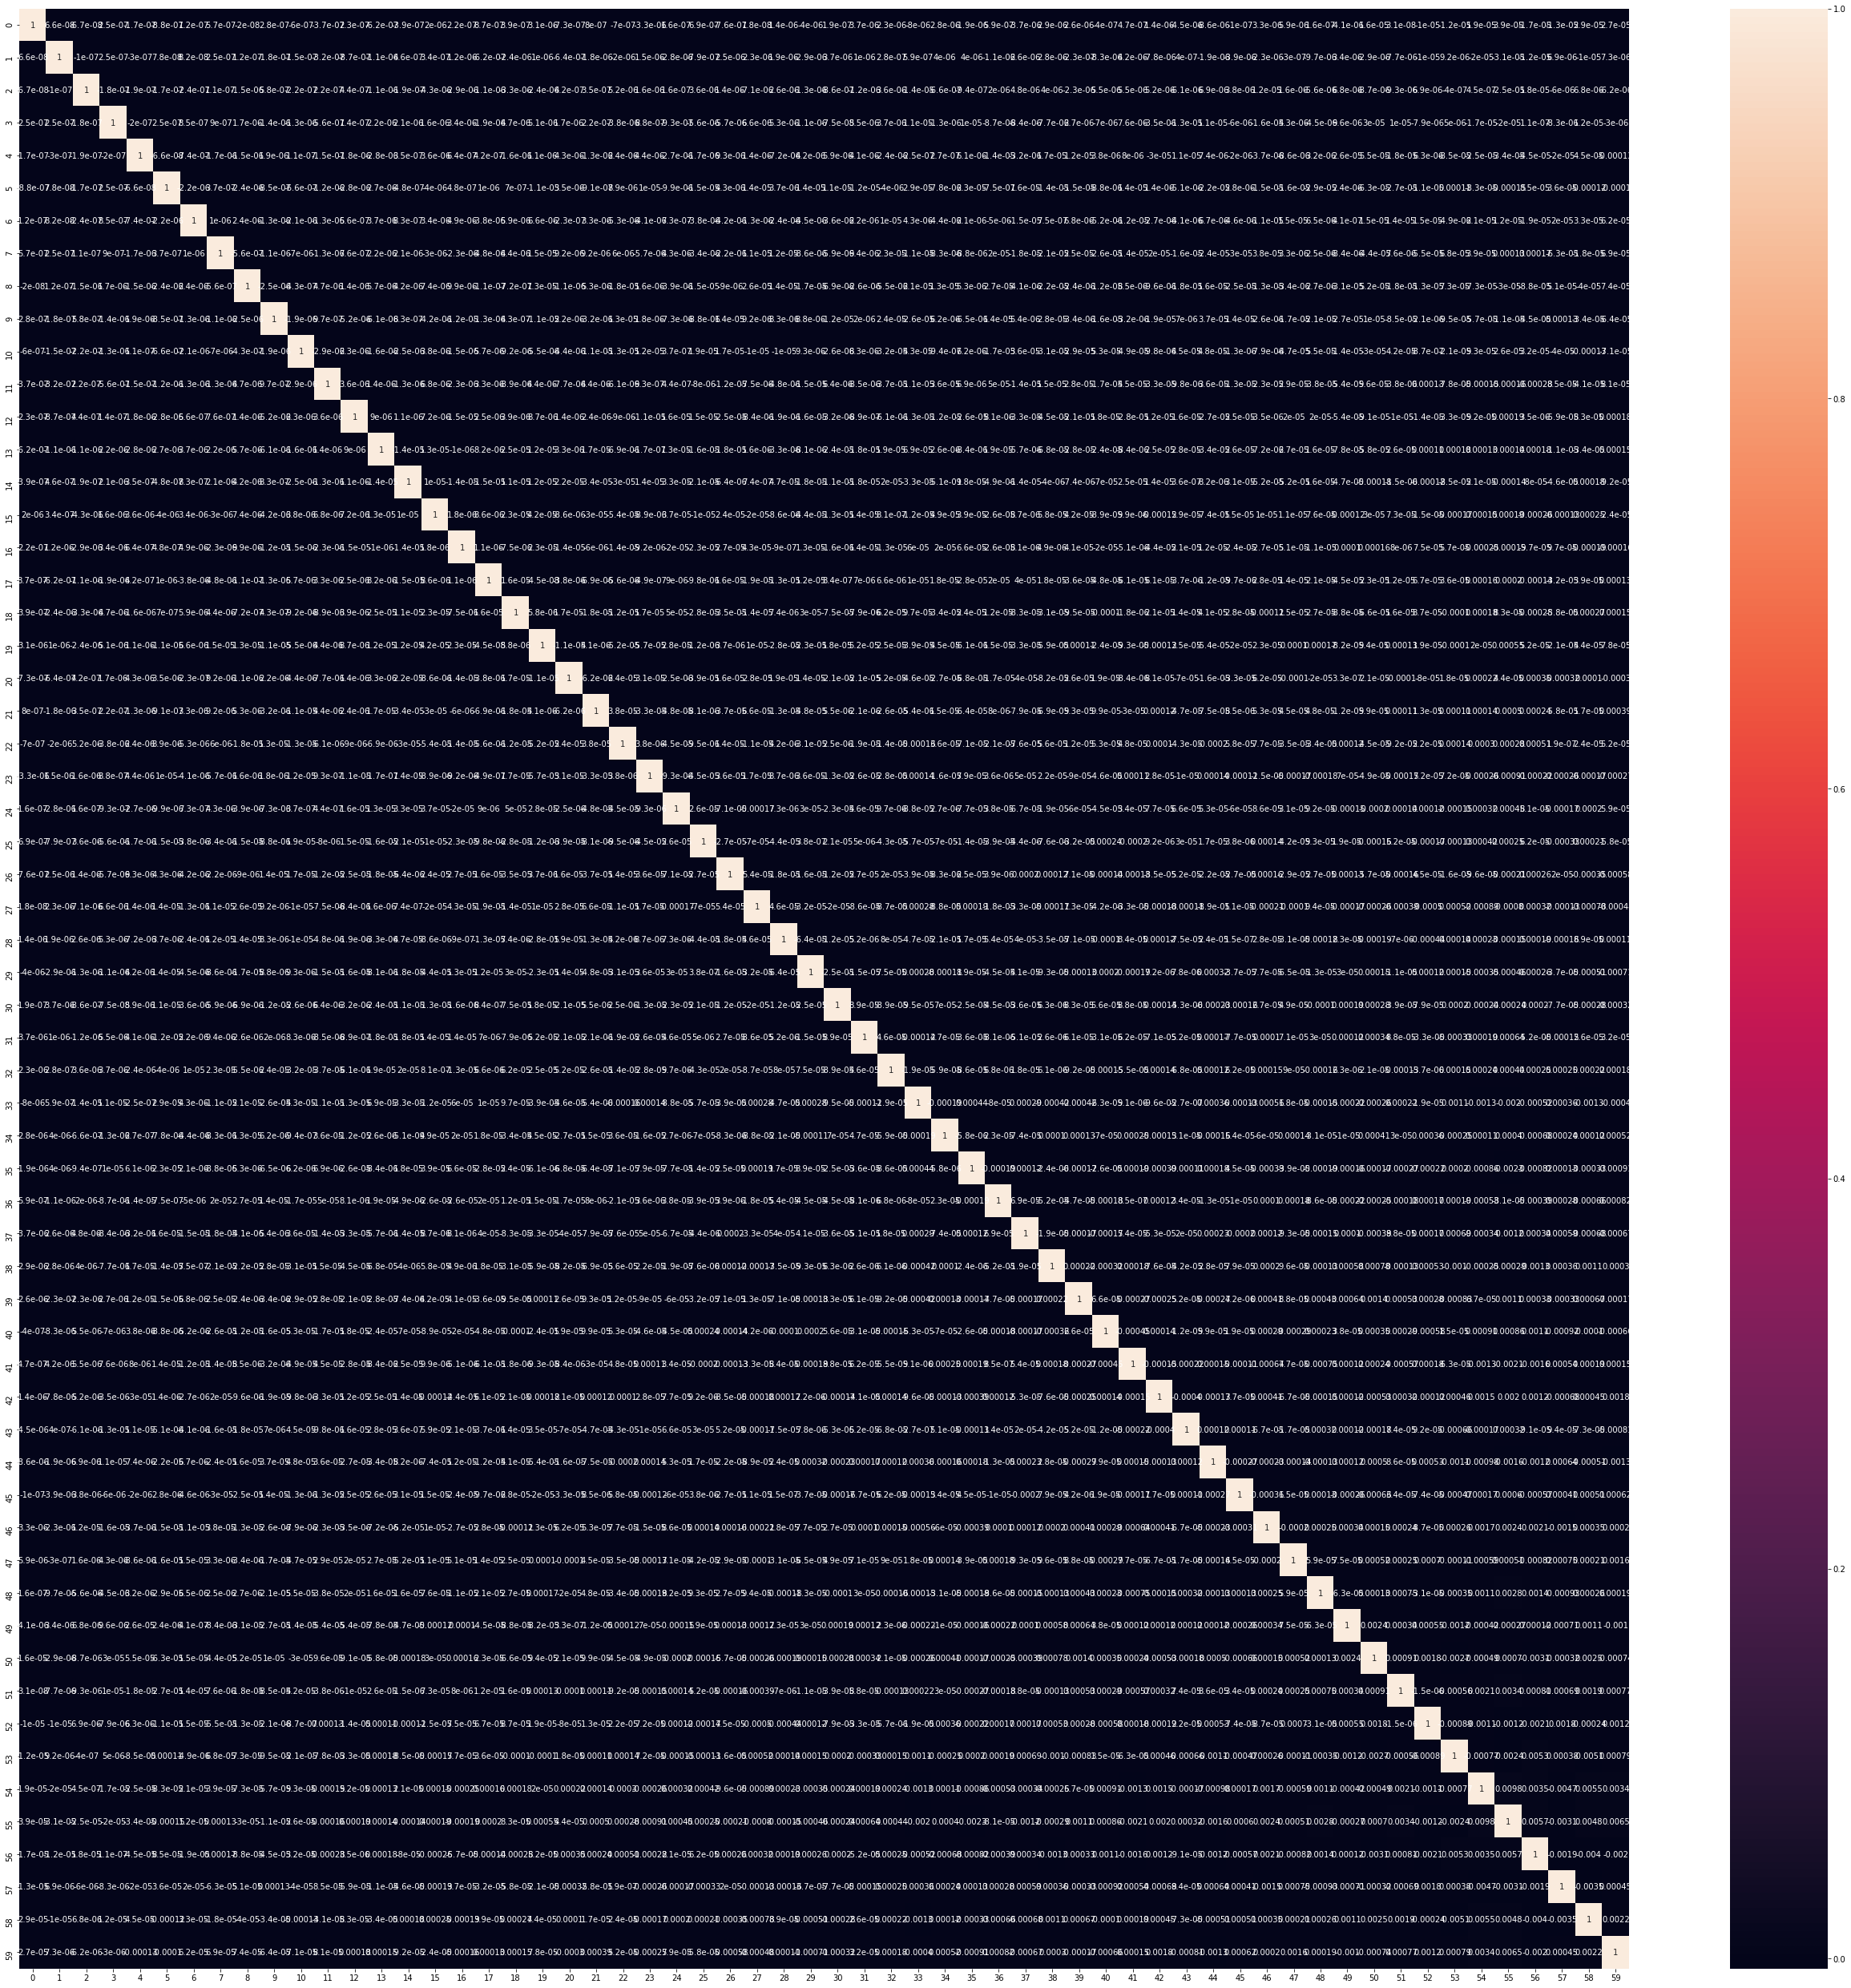

In [312]:
plt.figure(figsize=[45,45])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

### Applying logistic regression on the data on our Principal components

In [313]:
from sklearn.linear_model import LogisticRegression

In [314]:
#Assigning Class_weight as 'balanced' in order to account for the imbalanced dataset
learner_pca = LogisticRegression(class_weight='balanced')

In [315]:
model_pca = learner_pca.fit(X_train, y_train)

In [316]:
learner_pca.score(X_train, y_train)

0.8265238095238095

Making predictions on the test set

In [317]:
from sklearn import metrics

In [318]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [319]:

# predict churn on test data
y_pred = learner_pca.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = learner_pca.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6882 1369]
 [ 125  625]]
Sensitivity: 	0.83
Specificity: 	0.83
AUC:    	 0.9


## Hyperparameter tuning - PCA and Logistic Regression

In [320]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.919476
1    0.080524
Name: churn, dtype: float64

In [321]:

# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [322]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [323]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.286656,0.448846,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.744633,0.391011,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,3.056524,0.614769,0.102896,0.025465,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.880807,0.849821,0.874070,0.859760,0.903072,0.873506,0.018318,10
3,3.686651,0.827778,0.093110,0.029529,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.880506,0.853320,0.877441,0.864701,0.903216,0.875837,0.016763,2
4,3.056646,0.687075,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,3.776983,1.416852,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,3.650045,1.026443,0.137691,0.022050,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.880583,0.850238,0.874586,0.858469,0.903660,0.873507,0.018590,9
7,4.347312,0.948748,0.094770,0.043517,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.880361,0.854540,0.877876,0.863617,0.903402,0.875959,0.016657,1
8,2.556336,0.611880,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,3.091070,0.948444,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [324]:
# print best hyperparameters
print(model.best_score_)
print(model.best_params_)

0.8759594033354811
{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [325]:

# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6979 1272]
 [ 147  603]]
Sensitivity: 	0.8
Specificity: 	0.85
AUC:    	 0.89


The accuracy of the train data was 87.5% and that in the test data is 84%

In [371]:
recall=cm[1,1]/(cm[1,0]+cm[1,1])
print(recall)

0.7853333333333333


In [372]:
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print(precision)

0.2672413793103448


# Trying Random Forest

## Random Forest

In [326]:

# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [327]:

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [328]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.922943841371844
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [329]:
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8147  104]
 [ 401  349]]
Sensitivity: 	0.47
Specificity: 	0.99
AUC:    	 0.92


Choosing the best features

In [330]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [331]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [332]:
# OOB score
rf_model.oob_score_

0.9412380952380952

In [333]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8160   91]
 [ 444  306]]
Sensitivity: 	0.41
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


## Feature Importance using Random Forest

In [334]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 156 entries, mobile_number to tenure_bucket_4_to_10
dtypes: float64(125), int32(1), int64(27), uint8(3)
memory usage: 36.5 MB


In [335]:
len(rf_model.feature_importances_)

154

In [336]:
# predictors
features = df1.drop(['mobile_number','churn'], axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,7.508028
1,total_rech_amt_8,4.951451
2,total_og_mou_8,4.640062
3,arpu_8,3.573171
4,max_rech_amt_8,3.228272
5,loc_ic_mou_8,2.971823
6,last_day_rch_amt_8,2.818033
7,roam_og_mou_8,2.810895
8,loc_ic_t2m_mou_8,2.614181
9,roam_ic_mou_8,2.431882


## Top 30 features

In [337]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

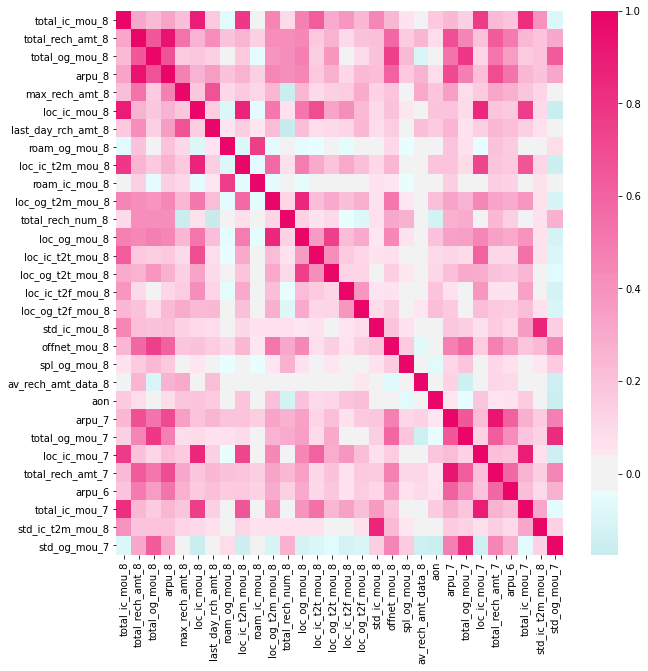

In [338]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [339]:
top_features = ['total_ic_mou_8', 'total_rech_amt_8', 'total_og_mou_8', 'arpu_8', 'max_rech_amt_8', 'loc_ic_mou_8', 
                'last_day_rch_amt_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [340]:

# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [341]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [342]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8509738872034033
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [343]:

# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6636 1615]
 [ 161  589]]
Sensitivity: 	0.79
Specificity: 	0.8
ROC:    	 0.86
